In [1]:
pip install Pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf 
from PIL import Image 
import os 
os.chdir(r'C:\Users\Dell\Desktop\465\project\traffic_sign_recognition')
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPool2D, Dense, Flatten, Dropout 

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'C:\\Users\\Dell\\Desktop\\465\\project\\traffic_sign_recognition'

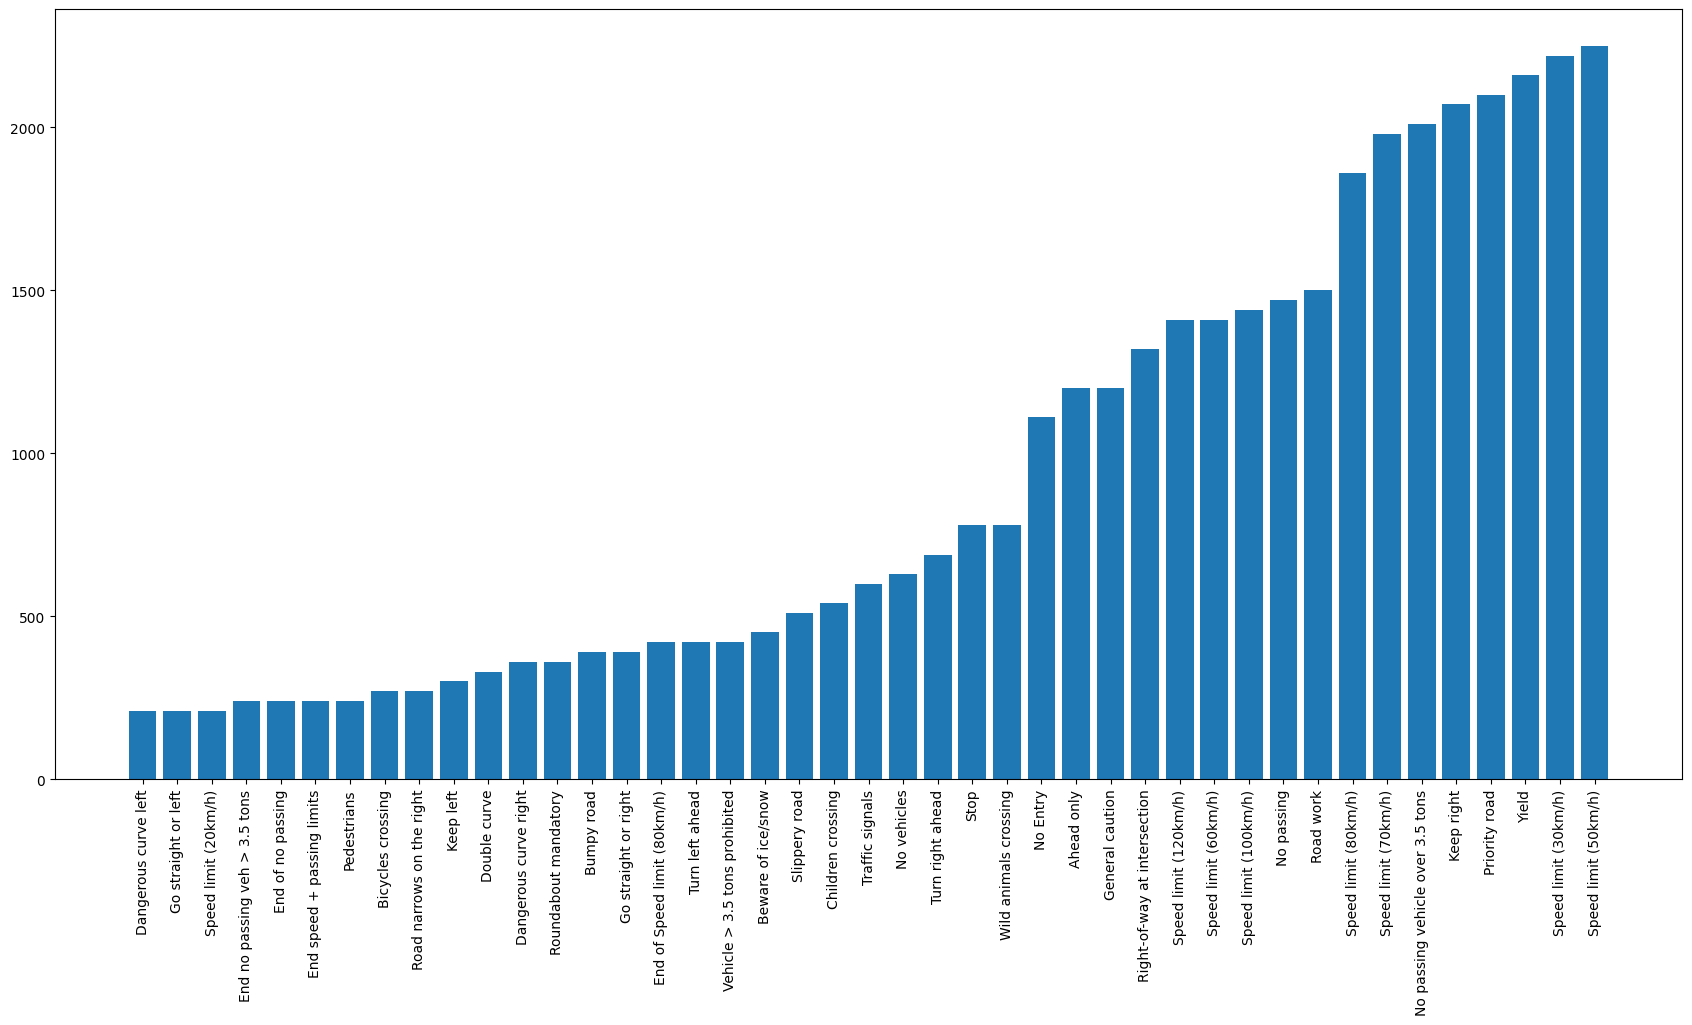

In [47]:
train_path = r'C:\Users\Dell\Desktop\465\project\traffic_sign_recognition\Train'
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    

zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

# PreProcess the images 

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Converting lists into numpy arrays

In [6]:
data = np.array(data)
labels = np.array(labels)

# Save Labels & Data for future use

In [7]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

# Load data & Labels

In [8]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [9]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape,  X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Convert labels to OneHot Encoding

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model

In [13]:
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Convolution2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation ='softmax'))

# Compilation of the model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test,y_test))

Epoch 1/30
981/981 [==============================] - 133s 132ms/step - loss: 2.0747 - accuracy: 0.4420 - val_loss: 0.7646 - val_accuracy: 0.7812
Epoch 2/30
981/981 [==============================] - 128s 131ms/step - loss: 0.7374 - accuracy: 0.7781 - val_loss: 0.2469 - val_accuracy: 0.9378
Epoch 3/30
981/981 [==============================] - 126s 129ms/step - loss: 0.4709 - accuracy: 0.8621 - val_loss: 0.1786 - val_accuracy: 0.9565
Epoch 4/30
981/981 [==============================] - 126s 128ms/step - loss: 0.4083 - accuracy: 0.8835 - val_loss: 0.2091 - val_accuracy: 0.9369
Epoch 5/30
981/981 [==============================] - 126s 128ms/step - loss: 0.3506 - accuracy: 0.8969 - val_loss: 0.1205 - val_accuracy: 0.9690
Epoch 6/30
981/981 [==============================] - 126s 129ms/step - loss: 0.3275 - accuracy: 0.9044 - val_loss: 0.1027 - val_accuracy: 0.9767
Epoch 7/30
981/981 [==============================] - 126s 128ms/step - loss: 0.2877 - accuracy: 0.9196 - val_loss: 0.0861 -

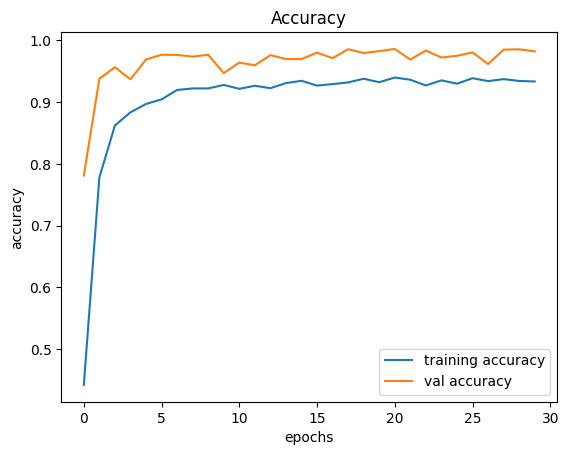

In [16]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

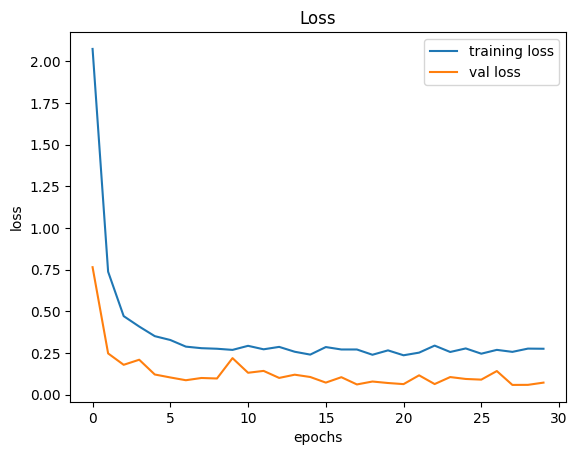

In [17]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing

In [18]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test,label

In [19]:
X_test, label = testing('Test.csv')

In [20]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

395/395 [==============================] - 6s 14ms/step


array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

# Accuracy with Test Data

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,y_pred))

0.9475851148060174


In [22]:
from sklearn.metrics import classification_report
print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.93      0.97      0.95       720
           2       0.94      0.98      0.96       750
           3       0.92      0.94      0.93       450
           4       0.97      0.96      0.96       660
           5       0.93      0.89      0.91       630
           6       0.98      0.85      0.91       150
           7       0.96      0.95      0.96       450
           8       0.93      0.98      0.96       450
           9       0.96      1.00      0.98       480
          10       0.99      0.95      0.97       660
          11       0.96      0.89      0.92       420
          12       0.96      0.97      0.96       690
          13       0.98      0.99      0.98       720
          14       0.99      1.00      0.99       270
          15       0.91      0.98      0.94       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [23]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(label,y_pred)


<AxesSubplot: >

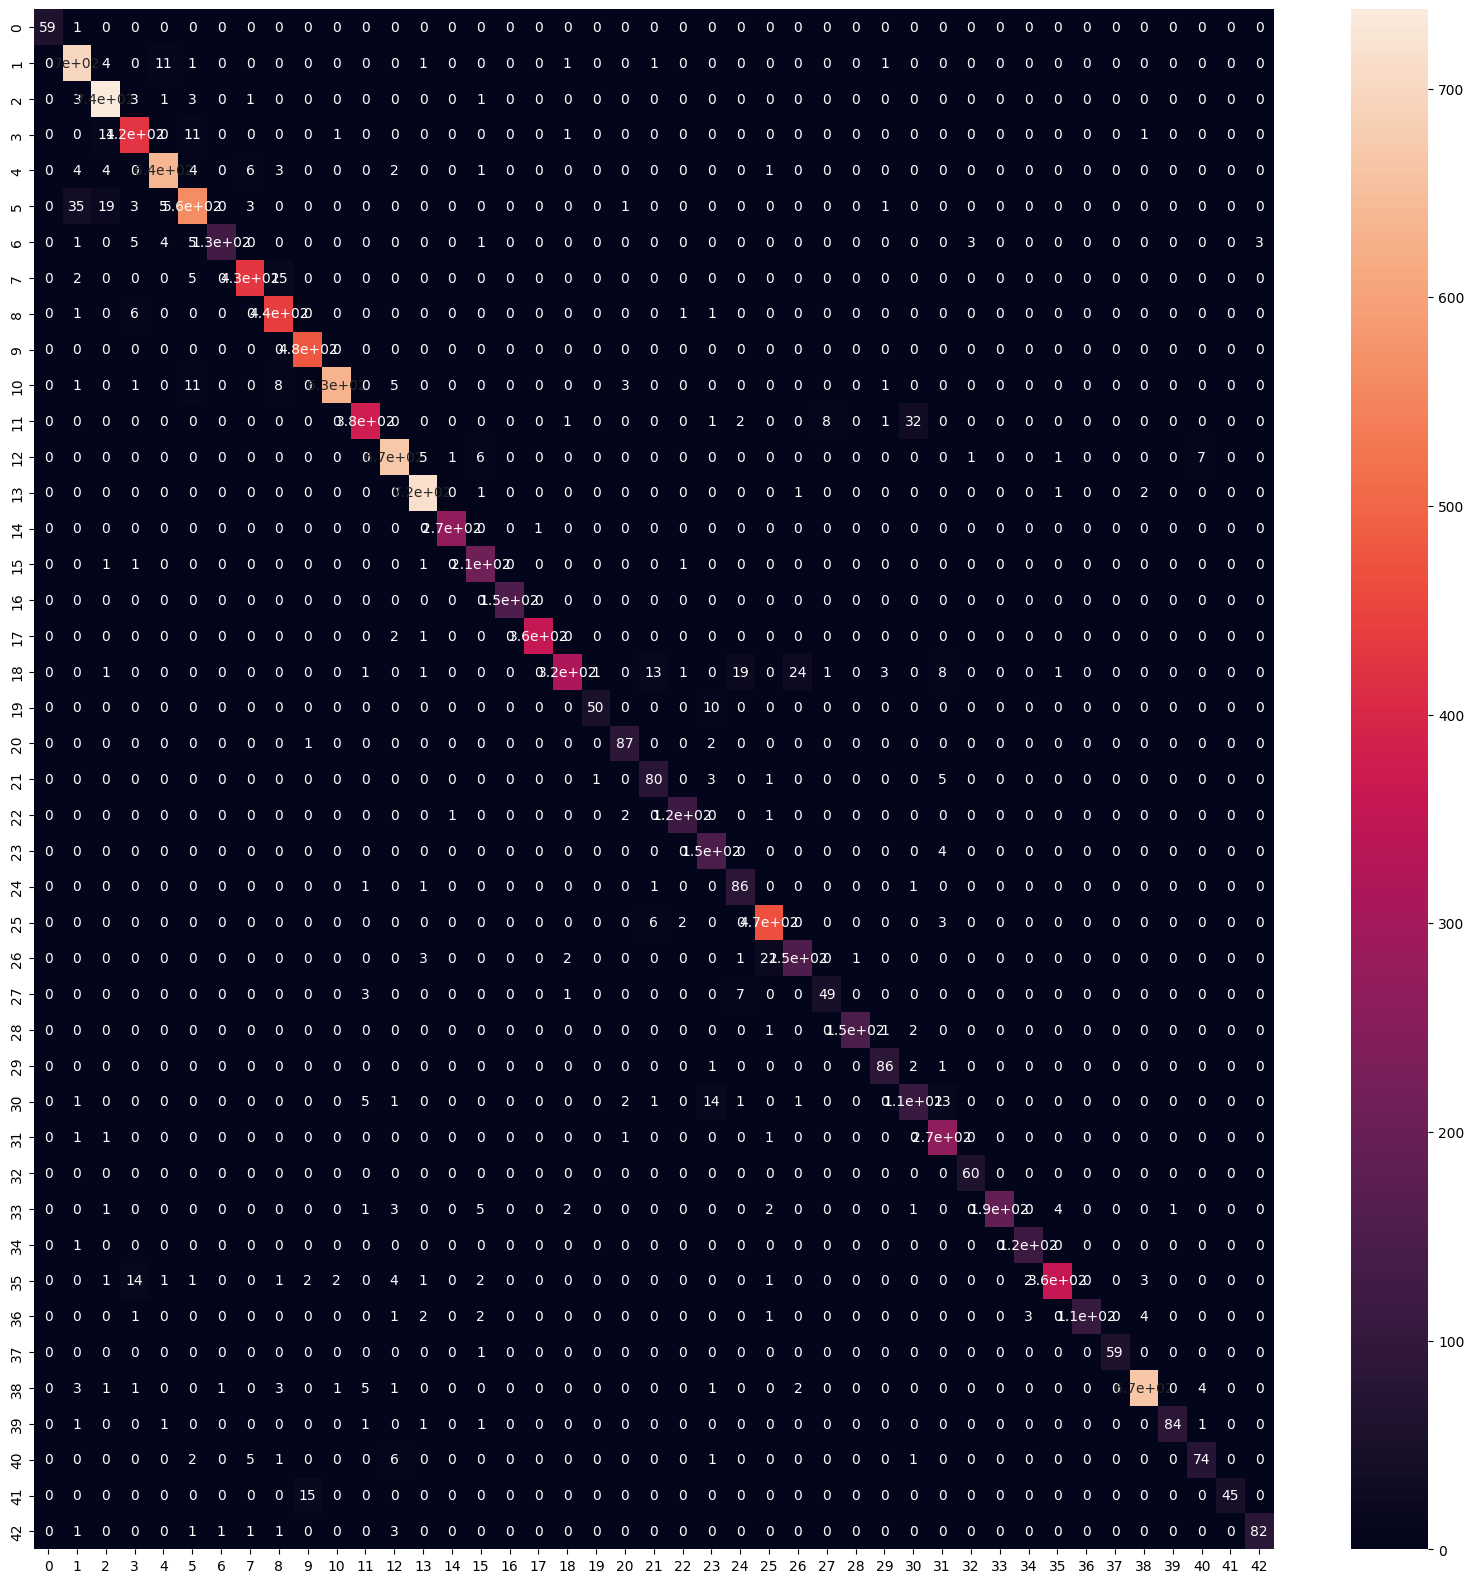

In [33]:
import seaborn as sns
df_cm= pd.DataFrame(cf, index = classes, columns = classes)
plt.figure(figsize =(20,20))
sns.heatmap(df_cm, annot=True)

# Save the model

In [26]:
model.save("./training/TSR.h5")

# Load the model

In [27]:
import os
os.chdir(r'C:\Users\Dell\Desktop\465\project\traffic_sign_recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [28]:
# Classes of traffic signs
classes = { 0: 'Speed limit (20km/h)',
            1: 'Speed limit (30km/h)',
            2: 'Speed limit (50km/h)',
            3: 'Speed limit (60km/h)',
            4: 'Speed limit (70km/h)',
            5: 'Speed limit (80km/h)',
            6: 'End of Speed limit (80km/h)',
            7: 'Speed limit (100km/h)',
            8: 'Speed limit (120km/h)',
            9: 'No passing',
            10: 'No passing vehicle over 3.5 tons',
            11: 'Right-of-way at intersection',
            12: 'Priority road',
            13: 'Yield',
            14: 'Stop',
            15: 'No vehicles',
            16: 'Vehicle > 3.5 tons prohibited',
            17: 'No Entry',
            18: 'General caution',
            19: 'Dangerous curve left',
            20: 'Dangerous curve right',
            21: 'Double curve',
            22: 'Bumpy road',
            23: 'Slippery road',
            24: 'Road narrows on the right', 
            25: 'Road work',
            26: 'Traffic signals',
            27: 'Pedestrians',
            28: 'Children crossing',
            29: 'Bicycles crossing',
            30: 'Beware of ice/snow',
            31: 'Wild animals crossing', 
            32: 'End speed + passing limits',
            33: 'Turn right ahead',
            34: 'Turn left ahead',
            35: 'Ahead only', 
            36: 'Go straight or right',
            37: 'Go straight or left',
            38: 'Keep right', 
            39: 'Keep left',
            40: 'Roundabout mandatory', 
            41: 'End of no passing', 
            42: 'End no passing veh > 3.5 tons' }

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,y_pred

1/1 [==============================] - 0s 30ms/step
Predicted traffic sign is:  Ahead only


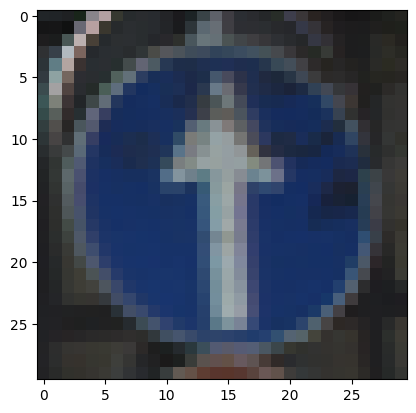

In [34]:
plot,prediction = test_on_img(r'C:\Users\Dell\Desktop\465\project\traffic_Sign_Recognition\Test\00009.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

